# [라벨링] 카테고리별 단어 리스트 생성

https://github.com/bab2min/kiwi

- 명사 : NNG, NNP, NNB
- 동사 : VV
- 형용사 : VA, VX
- 어근 : XR
- 부호, 외국어, 특수문자 : SL, SH, SN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kiwipiepy import Kiwi
from tqdm import tqdm
from collections import Counter

In [8]:
df = pd.read_csv("/data/ephemeral/home/level2-nlp-datacentric-nlp-10/train_denoised_none.csv")
df = df.dropna(subset=['text'])

In [3]:
kiwi = Kiwi()

In [4]:
# 품사 분류
def part_classification(text):
    """
    텍스트의 품사를 태깅(분류)하는 함수

    Args:
        text: 데이터셋의 'text'열의 데이터

    Returns:
        raw_part_class: 각 텍스트의 토큰에 대한 품사 정보
    """
    raw_part_class = kiwi.tokenize(text, normalize_coda=False)
    return raw_part_class

In [5]:
# 품사 필터링 (명사, 동사, 형용사, 어근)
MAIN_PART = ['NNG', 'NNB', 'NNP', 'VV', 'VA', 'XR'] # 필터링할 주요 품사
VERB_ADJ_PART = ['VV', 'VA'] # 동사, 형용사

def part_filtering(df, text_col):
    """
    데이터프레임의 각 텍스트에서 필터링된 단어 리스트를 생성하는 함수

    Args:
        df: 필터링 할 대상 데이터프레임
        text_col: 각 토큰에 대해 태그된 품사 정보 열

    Returns:
        filtered_words: 필터링된 단어 리스트
    """
    filtered_words = []

    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        if row[text_col]:
            class_filter = [
                token.form + '다' if token.tag in VERB_ADJ_PART else token.form
                for token in row[text_col]
                if token.tag in MAIN_PART and len(token.form) > 1
            ]
            filtered_words.append(class_filter)
        else:
            filtered_words.append([])

    return filtered_words

In [6]:
# 단어 개수 세기
def word_count(word_list):
    """
    단어 리스트에서 단어의 개수를 세고 정렬하여 반환하는 함수

    Args:
        word_list: 필터링된 단어 리스트 열

    Returns:
        sorted_words: 개수가 많은 순서대로 정렬된 단어 리스트
    """
    word_counter = Counter(word_list)
    sorted_words = sorted(word_counter.items(), key=lambda item: item[1], reverse=True)

    return sorted_words

In [10]:
df['text_class'] = df['text'].apply(part_classification)

In [11]:
df['text_class_filter'] = part_filtering(df, 'text_class')

100%|██████████| 2715/2715 [00:00<00:00, 17302.37it/s]


In [12]:
df

,ID,text,target,text_class,text_class_filter
0,ynat-v1_train_00000,정영석 파파미사일 KT에 이용기간 2년 단축…2분기종료2보,4,"[(정영석, NNP, 0, 3), (파파, NNP, 4, 2), (미사일, NNG,...","[정영석, 파파, 미사일, 이용, 기간, 단축, 분기, 종료]"
1,ynat-v1_train_00001,검찰청에 로또 당첨자 회장에 2억 달러 송금,3,"[(검찰청, NNG, 0, 3), (에, JKB, 3, 1), (로또, NNG, 5...","[검찰청, 로또, 당첨자, 회장, 달러, 송금]"
2,ynat-v1_train_00002,北 김정은 자주통일 새 시대 열어나가야 보자,2,"[(北, SH, 0, 1), (김정은, NNP, 2, 3), (자주, NNG, 6,...","[김정은, 자주, 통일, 시대]"
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5,"[(갤노트8, NNP, 0, 4), (주말, NNG, 5, 2), (27, SN, ...","[갤노트8, 주말, 개통, 시장, 불법, 보조금, 얼룩]"
4,ynat-v1_train_00004,美대선 앞두고 중국인 단체 발언서 비공개로 감시 강화,6,"[(美, SH, 0, 1), (대선, NNG, 1, 2), (앞두, VV, 4, 2...","[대선, 앞두다, 중국인, 단체, 발언, 공개, 감시, 강화]"
...,...,...,...,...,...
2795,ynat-v1_train_02795,트럼프 폭스뉴스 앵커들 충성도 점수매겨…10점만점에 12점도,6,"[(트럼프, NNP, 0, 3), (폭스뉴스, NNP, 4, 4), (앵커, NNG...","[트럼프, 폭스뉴스, 앵커, 충성도, 점수, 매기다, 만점]"
2796,ynat-v1_train_02796,삼성 갤럭시S9 정식 출시 첫 주말 이통시장 잠잠,2,"[(삼성, NNP, 0, 2), (갤럭시S, NNP, 3, 4), (9, SN, 7...","[삼성, 갤럭시S, 정식, 출시, 주말, 이통, 시장, 잠자다]"
2797,ynat-v1_train_02797,텔레그램 한인 등 아시아서 2시간 다운…서비스 정상화종료2보,4,"[(텔레그램, NNP, 0, 4), (한인, NNG, 5, 2), (등, NNB, ...","[텔레그램, 한인, 아시아, 시간, 서비스, 정상, 종료]"
2798,ynat-v1_train_02798,인터뷰 류현진 친구에게 안타 맞는 것 싫어해…승부는 냉정,1,"[(인터뷰, NNG, 0, 3), (류현진, NNP, 4, 3), (친구, NNP,...","[인터뷰, 류현진, 친구, 안타, 싫어하다, 승부, 냉정]"


In [13]:
df_cnt = [word for sublist in df['text_class_filter'] for word in sublist]
word_counts = word_count(df_cnt)
print(word_counts[:30])

[('종합', 288), ('대통령', 103), ('프로', 67), ('한국', 63), ('이란', 59), ('공감', 56), ('대표', 55), ('게시판', 49), ('출시', 48), ('개발', 47), ('배우다', 47), ('지원', 46), ('배우', 46), ('시장', 42), ('리그', 41), ('정상', 41), ('삼성', 37), ('농구', 37), ('투자', 36), ('시즌', 36), ('감독', 36), ('서울', 34), ('중국', 34), ('세계', 34), ('경기', 33), ('축구', 33), ('트럼프', 33), ('미국', 33), ('정부', 33), ('분기', 32)]


In [14]:
len(df_cnt)

17796

## TF-IDF 방식을 통한 클러스터링

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from konlpy.tag import Kkma, Mecab
import nltk
import string

In [26]:
df = pd.read_csv("/data/ephemeral/home/level2-nlp-datacentric-nlp-10/train_denoised_none.csv")
df = df.dropna(subset=['text'])

In [33]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
# string.punctuation : 모든 구두점문자(쉼표, 마침표, 물음표, 느낌표, 따옴표 등)를 담고있는 문자열
# ord : 입력받은 문자열의 아스키 코드(유사:유니코드)를 반환.

In [34]:
# kkma_kor = Kkma()
mecab = Mecab()

In [35]:
# 한국어 : 구두점 제거 및 표제어 추출 함수
def KkmaLemNormalize_kor(text):
    tokens = mecab.morphs(text)
    return ' '.join(tokens)

In [36]:
tfidf_vect_kor = TfidfVectorizer(tokenizer=KkmaLemNormalize_kor, ngram_range=(1,2))
# TfidfVectorizer를 초기화한 후 앞서 정의한 LemNormalize 함수를 사용하여 텍스트 전처리를 수행한다.
# ngram_range : 단어의 단일 및 이중(n-gram) 토큰을 모두 포함하도록 벡터화 한다.

In [37]:
ftr_vector_kor = tfidf_vect_kor.fit_transform(df['text'])
# 원하는 컬럼을 가져와 fir_transform() 메소드를 통해 TF-IDF 모델을 학습하고 변환하며 그에 해당하는 행렬을 생성한다.

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [38]:
kmeans_kor = KMeans(n_clusters=7, max_iter=10000, random_state=42)

In [39]:
cluster_label_kor = kmeans_kor.fit_predict(ftr_vector_kor)

df['cluster'] = cluster_label_kor
df

,ID,text,target,cluster
0,ynat-v1_train_00000,정영석 파파미사일 KT에 이용기간 2년 단축…2분기종료2보,4,4
1,ynat-v1_train_00001,검찰청에 로또 당첨자 회장에 2억 달러 송금,3,3
2,ynat-v1_train_00002,北 김정은 자주통일 새 시대 열어나가야 보자,2,5
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5,4
4,ynat-v1_train_00004,美대선 앞두고 중국인 단체 발언서 비공개로 감시 강화,6,5
...,...,...,...,...
2795,ynat-v1_train_02795,트럼프 폭스뉴스 앵커들 충성도 점수매겨…10점만점에 12점도,6,4
2796,ynat-v1_train_02796,삼성 갤럭시S9 정식 출시 첫 주말 이통시장 잠잠,2,2
2797,ynat-v1_train_02797,텔레그램 한인 등 아시아서 2시간 다운…서비스 정상화종료2보,4,4
2798,ynat-v1_train_02798,인터뷰 류현진 친구에게 안타 맞는 것 싫어해…승부는 냉정,1,1


/tmp/ipykernel_257004/4180389190.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='husl')


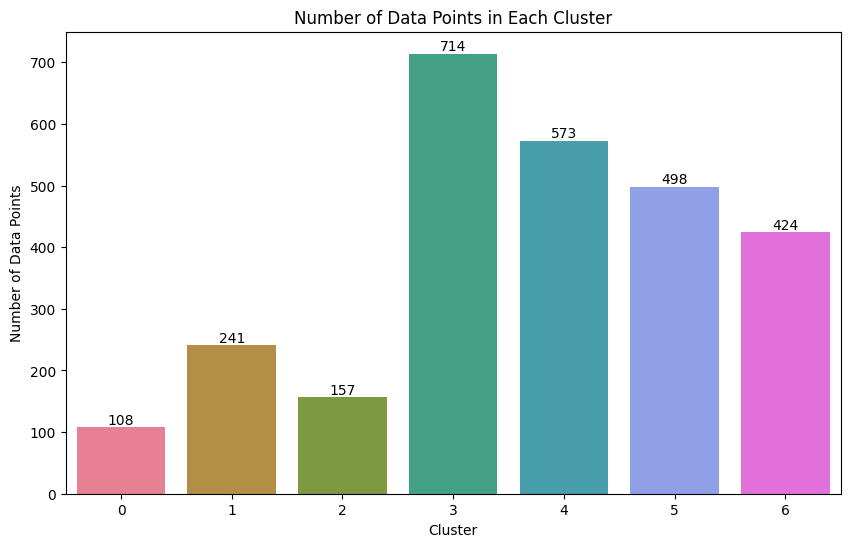

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 클러스터의 데이터 개수 계산
cluster_counts = df['cluster'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='husl')

# 그래프에 레이블 추가
for i, count in enumerate(cluster_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# 그래프 설정
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(cluster_counts.index)
plt.show()


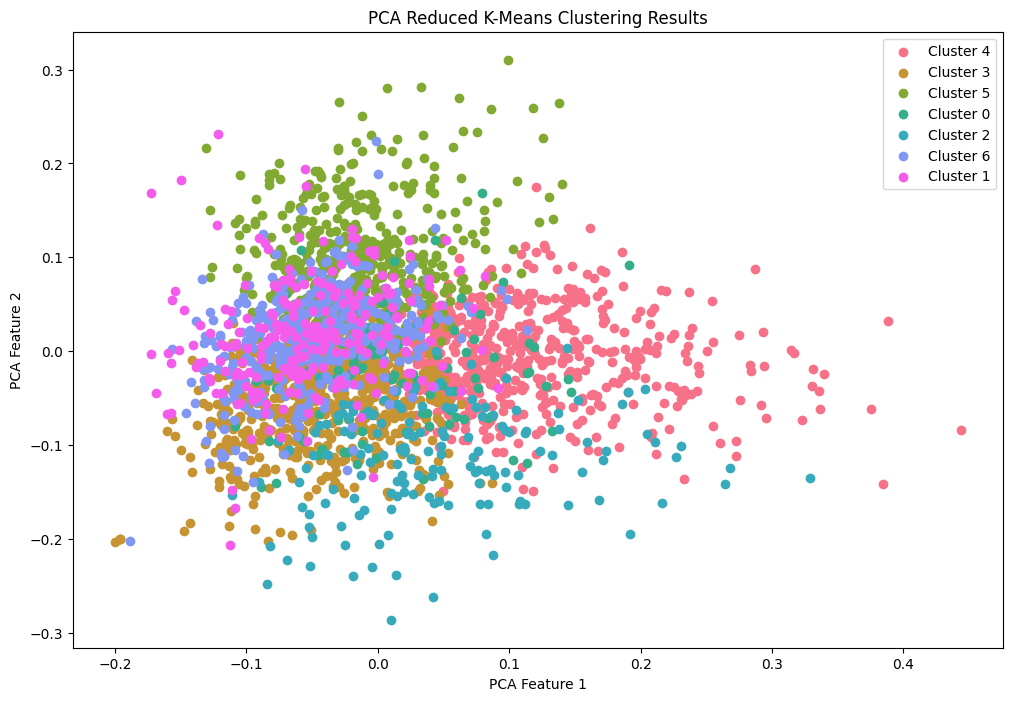

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(ftr_vector_kor.toarray())
df[['pca_feature1', 'pca_feature2']] = reduced_features

# 시각화
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', n_colors=len(df['cluster'].unique()))
# markers = ['o', 's', '^']

for cluster, color in zip(df['cluster'].unique(), colors):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(
        cluster_data['pca_feature1'], 
        cluster_data['pca_feature2'], 
        color=color,
        label=f'Cluster {cluster}'
    )

plt.title('PCA Reduced K-Means Clustering Results')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [45]:
from sklearn.manifold import TSNE

# t-SNE로 차원 축소
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
reduced_features_tsne = tsne.fit_transform(ftr_vector_kor.toarray())
df[['tsne_feature1', 'tsne_feature2']] = reduced_features_tsne

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


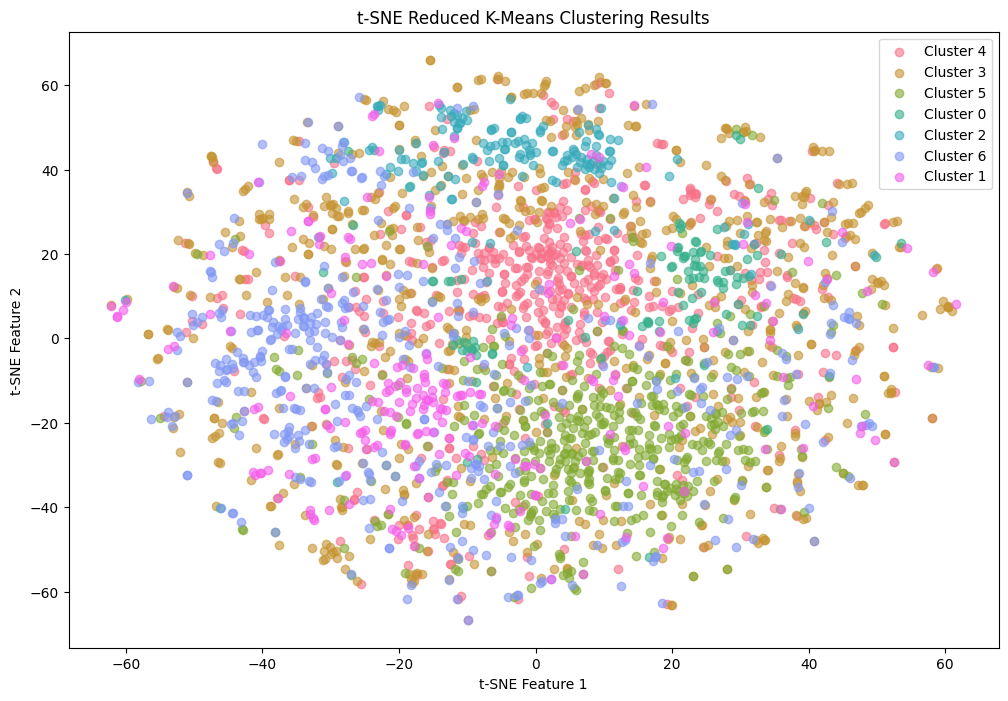

In [46]:
# 시각화 설정
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', n_colors=len(df['cluster'].unique()))

for cluster, color in zip(df['cluster'].unique(), colors):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(
        cluster_data['tsne_feature1'], 
        cluster_data['tsne_feature2'], 
        color=color, 
        label=f'Cluster {cluster}', 
        alpha=0.6
    )

# 시각화에 제목과 축 레이블 추가
plt.title('t-SNE Reduced K-Means Clustering Results')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

## Word2Vec 방식을 통한 클러스터링

In [58]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from konlpy.tag import Mecab
from kiwipiepy import Kiwi
import string
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [59]:
df = pd.read_csv("/data/ephemeral/home/level2-nlp-datacentric-nlp-10/train_denoised_none.csv")
df = df.dropna(subset=['text'])

In [60]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
# mecab = Mecab()
kiwi = Kiwi()

In [61]:
def MecabLemNormalize_kor(text): # 형태소 분석 값 저장
    tokens = mecab.morphs(text)
    return ','.join(tokens)

In [62]:
df['pos_tagging'] = df['text'].map(MecabLemNormalize_kor)

embedding_model = Word2Vec(df['pos_tagging'],  window = 2, min_count=50, workers=4,  sg=1)

In [63]:
def get_sentence_mean_vector(morphs):
    vector = []
    for i in morphs:
        try:
            vector.append(embedding_model.wv[i])
        except KeyError as e:
            pass
    try:
        return np.mean(vector, axis=0)
    except IndexError as e:
        pass

# 각 단어 벡터의 평균값을 word_mean에 저장한다.
df['word_mean'] = df['pos_tagging'].map(get_sentence_mean_vector)

In [64]:
word_vectors = df.word_mean.to_list()

kmeans_clustering = KMeans(n_clusters=7, max_iter=10000, random_state=42, n_init=10)
idx = kmeans_clustering.fit_predict( word_vectors )

df['cluster'] = idx

In [65]:
df

,ID,text,target,pos_tagging,word_mean,cluster
0,ynat-v1_train_00000,정영석 파파미사일 KT에 이용기간 2년 단축…2분기종료2보,4,"정영석,파파,미사일,KT,에,이용,기간,2,년,단축,…,2,분기,종료,2,보","[-0.14893405, -0.006059526, 0.06875361, 0.0695...",6
1,ynat-v1_train_00001,검찰청에 로또 당첨자 회장에 2억 달러 송금,3,"검찰청,에,로또,당첨자,회장,에,2,억,달러,송금","[-0.13583381, -0.00066576415, 0.070179135, 0.0...",6
2,ynat-v1_train_00002,北 김정은 자주통일 새 시대 열어나가야 보자,2,"北,김정,은,자주,통일,새,시대,열,어,나가,야,보,자","[-0.18534543, 0.021047462, 0.08640776, 0.06591...",2
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5,"갤,노트,8,주말,27,만,대,개통,…,시장,은,불법,보조금,얼룩","[-0.15085876, 0.016352428, 0.07034441, 0.07696...",6
4,ynat-v1_train_00004,美대선 앞두고 중국인 단체 발언서 비공개로 감시 강화,6,"美,대선,앞두,고,중국인,단체,발언,서,비,공개,로,감시,강화","[-0.16221206, 0.06461049, 0.06081969, 0.037504...",0
...,...,...,...,...,...,...
2795,ynat-v1_train_02795,트럼프 폭스뉴스 앵커들 충성도 점수매겨…10점만점에 12점도,6,"트럼프,폭스,뉴스,앵커,들,충성,도,점수,매겨,…,10,점,만점,에,12,점,도","[-0.100018874, 0.021066874, 0.07015009, 0.0819...",1
2796,ynat-v1_train_02796,삼성 갤럭시S9 정식 출시 첫 주말 이통시장 잠잠,2,"삼성,갤럭시,S,9,정식,출시,첫,주말,이통,시장,잠잠","[-0.17387402, 0.05852304, 0.078337476, 0.10830...",4
2797,ynat-v1_train_02797,텔레그램 한인 등 아시아서 2시간 다운…서비스 정상화종료2보,4,"텔레,그램,한인,등,아,시,아서,2,시간,다운,…,서비스,정상,화,종료,2,보","[-0.14992666, 0.023320802, 0.07651147, 0.06381...",2
2798,ynat-v1_train_02798,인터뷰 류현진 친구에게 안타 맞는 것 싫어해…승부는 냉정,1,"인터뷰,류현진,친구,에게,안타,맞,는,것,싫,어,해,…,승부,는,냉정","[-0.16172434, 0.029698033, 0.09461027, 0.07602...",2


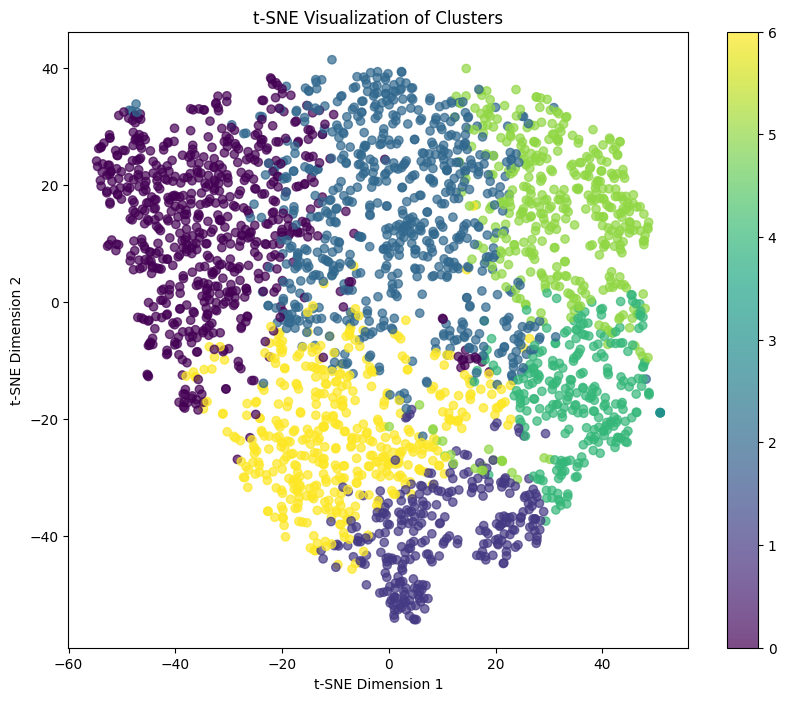

In [66]:
word_vectors = df.word_mean.to_list()
word_vectors = np.array(word_vectors)

tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)


df['tsne_x'] = word_vectors_2d[:, 0]
df['tsne_y'] = word_vectors_2d[:, 1]

# Plot the scatter plot with different colors for each cluster
plt.figure(figsize=(10, 8))
plt.scatter(df['tsne_x'], df['tsne_y'], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()

/tmp/ipykernel_257004/1377866143.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='husl')


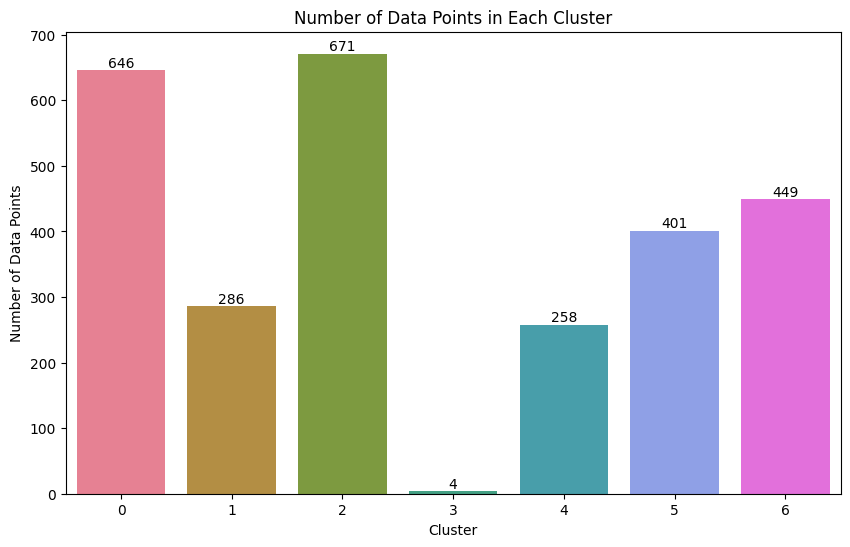

In [67]:
# 각 클러스터의 데이터 개수 계산
cluster_counts = df['cluster'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='husl')

# 그래프에 레이블 추가
for i, count in enumerate(cluster_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# 그래프 설정
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(cluster_counts.index)
plt.show()

## FastText 방식을 통한 클러스터링

In [68]:
import pandas as pd
from gensim.models import FastText
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import re
from konlpy.tag import Mecab
from kiwipiepy import Kiwi

In [70]:
# 데이터 불러오기 및 전처리
df = pd.read_csv("/data/ephemeral/home/level2-nlp-datacentric-nlp-10/train_denoised_none.csv")
df = df.dropna(subset=['text'])

In [69]:
# 형태소 분석기 설정
# mecab = Mecab()
kiwi = Kiwi()

In [71]:
# 텍스트 토큰화 함수
def tokenize_text(text):
    # 간단한 전처리 (구두점 제거)
    text = re.sub(r'[^\w\s]', '', text)
    return mecab.morphs(text)

In [72]:
# 모든 텍스트를 토큰화하여 리스트에 저장
tokenized_texts = df['text'].apply(tokenize_text).tolist()

In [73]:
# FastText 모델 학습
fasttext_model = FastText(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, sg=1, workers=4, seed=42)

In [74]:
# 문장 벡터 생성 함수
def get_sentence_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 모든 문장의 벡터를 생성
sentence_vectors = np.array([get_sentence_vector(sentence, fasttext_model) for sentence in tokenized_texts])

In [75]:
# KMeans 클러스터링
kmeans = KMeans(n_clusters=7, max_iter=10000, random_state=42)
cluster_labels = kmeans.fit_predict(sentence_vectors)

# 클러스터 결과를 데이터프레임에 추가
df['cluster'] = cluster_labels
df

,ID,text,target,cluster
0,ynat-v1_train_00000,정영석 파파미사일 KT에 이용기간 2년 단축…2분기종료2보,4,4
1,ynat-v1_train_00001,검찰청에 로또 당첨자 회장에 2억 달러 송금,3,3
2,ynat-v1_train_00002,北 김정은 자주통일 새 시대 열어나가야 보자,2,3
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5,4
4,ynat-v1_train_00004,美대선 앞두고 중국인 단체 발언서 비공개로 감시 강화,6,0
...,...,...,...,...
2795,ynat-v1_train_02795,트럼프 폭스뉴스 앵커들 충성도 점수매겨…10점만점에 12점도,6,3
2796,ynat-v1_train_02796,삼성 갤럭시S9 정식 출시 첫 주말 이통시장 잠잠,2,4
2797,ynat-v1_train_02797,텔레그램 한인 등 아시아서 2시간 다운…서비스 정상화종료2보,4,0
2798,ynat-v1_train_02798,인터뷰 류현진 친구에게 안타 맞는 것 싫어해…승부는 냉정,1,3


In [76]:
# 실루엣 점수 계산
silhouette_avg = silhouette_score(sentence_vectors, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# 결과 확인
print(df.head())

Silhouette Score: 0.3170
                    ID                              text  target  cluster
0  ynat-v1_train_00000  정영석 파파미사일 KT에 이용기간 2년 단축…2분기종료2보       4        4
1  ynat-v1_train_00001          검찰청에 로또 당첨자 회장에 2억 달러 송금       3        3
2  ynat-v1_train_00002          北 김정은 자주통일 새 시대 열어나가야 보자       2        3
3  ynat-v1_train_00003     갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩       5        4
4  ynat-v1_train_00004     美대선 앞두고 중국인 단체 발언서 비공개로 감시 강화       6        0


/tmp/ipykernel_257004/1377866143.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='husl')


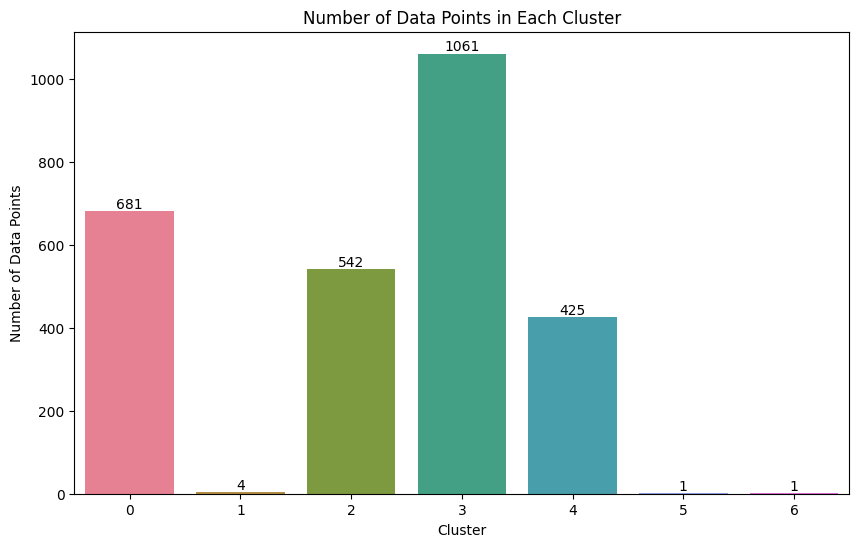

In [77]:
# 각 클러스터의 데이터 개수 계산
cluster_counts = df['cluster'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='husl')

# 그래프에 레이블 추가
for i, count in enumerate(cluster_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# 그래프 설정
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(cluster_counts.index)
plt.show()

## KoBERT 활용한 클러스터링

In [79]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer

/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [80]:
# 데이터 불러오기 및 전처리
df = pd.read_csv("/data/ephemeral/home/level2-nlp-datacentric-nlp-10/train_denoised_none.csv")
df = df.dropna(subset=['text'])

In [ ]:
# KoBERT 기반 SentenceTransformer 모델 로드
model = SentenceTransformer('skt/kobert-base-v1')

No sentence-transformers model found with name monologg/kobert. Creating a new one with mean pooling.


ValueError: Loading monologg/kobert requires you to execute the configuration file in that repo on your local machine. Make sure you have read the code there to avoid malicious use, then set the option `trust_remote_code=True` to remove this error.

In [82]:
# 텍스트 임베딩 생성
embeddings = model.encode(df['text'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/85 [00:00<?, ?it/s]

/opt/conda/conda-bld/pytorch_1695392020201/work/aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [405,0,0], thread: [32,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1695392020201/work/aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [405,0,0], thread: [33,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1695392020201/work/aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [405,0,0], thread: [34,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1695392020201/work/aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [405,0,0], thread: [35,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1695392020201/work/aten/src/ATen/native/cuda/Indexing.cu:1292: indexSelectLargeIndex: block: [405,0,0], thread: [36,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
# KMeans 클러스터링
kmeans = KMeans(n_clusters=7, max_iter=10000, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# 클러스터 결과를 데이터프레임에 추가
df['cluster'] = cluster_labels

In [ ]:
# 실루엣 점수 계산
silhouette_avg = silhouette_score(embeddings, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')


In [ ]:
# 클러스터 시각화 (PCA 또는 t-SNE 사용 가능)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=df['cluster'], palette='Set1', s=50)
plt.title('KMeans Clustering of KoBERT Embeddings')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(title='Cluster')
plt.show()

## 카테고리별 단어 리스트 적용